In [4]:
import numpy as np
classes = ['daisy','dandelion','rose','sunflower','tulip']
X = np.load("flowers/%s_x.npy"%(classes[0]))
y = np.load("flowers/%s_y.npy"%(classes[0]))
print(X.shape)
for flower in classes[1:]:
    X_aux = np.load("flowers/%s_x.npy"%(flower))
    y_aux = np.load("flowers/%s_y.npy"%(flower))
    print(X_aux.shape)
    X = np.concatenate((X, X_aux), axis=0)
    y = np.concatenate((y, y_aux), axis=0)
    
print(X.shape)
print(y.shape)

(769, 150, 150, 3)
(1052, 150, 150, 3)
(784, 150, 150, 3)
(734, 150, 150, 3)
(984, 150, 150, 3)
(4323, 150, 150, 3)
(4323,)


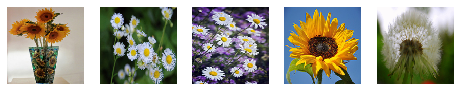

In [5]:
import random 
random.seed(42) 
from matplotlib import pyplot as plt
import cv2
 
for idx in range(5): 
  rnd_index = random.randint(0, 4000) 
  plt.subplot(1,5,idx+1),plt.imshow(cv2.cvtColor(X[rnd_index],cv2.COLOR_BGR2RGB)) 
  plt.xticks([]),plt.yticks([])
plt.savefig("flowers_samples.jpg", bbox_inches='tight')
plt.show() 
 

In [6]:
from keras import utils as np_utils
X = (X.astype(np.float32))/255.0 
y = np_utils.to_categorical(y, len(classes))
print(X.shape)
print(y.shape)

Using TensorFlow backend.


(4323, 150, 150, 3)
(4323, 5)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
input_shape = x_train.shape[1:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(input_shape)


(3458, 150, 150, 3)
(3458, 5)
(865, 150, 150, 3)
(865, 5)
(150, 150, 3)


In [ ]:
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, Activation, BatchNormalization
def CNN(input_shape):
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(5, 5), padding='same',  strides=(2,2), input_shape=input_shape))
    model.add(Activation('relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.2))
 
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', strides=(2,2))) 
    model.add(Activation('relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.2))
 
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', strides=(2,2))) 
    model.add(Activation('relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.2))
    
    model.add(Conv2D(256, kernel_size=(3, 3), padding='same', strides=(2,2))) 
    model.add(Activation('relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation = "softmax"))

    return model


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.1,
        horizontal_flip=True
        )


In [10]:
datagen.fit(x_train)
 
model = CNN(input_shape)
 
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
 
ckpt = ModelCheckpoint('model_flowers.h5', save_best_only=True,monitor='val_loss', mode='min', save_weights_only=False) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=32),
                    epochs=200,
                    validation_data=(x_test, y_test),
                    callbacks=[ckpt],
                    steps_per_epoch=len(x_train) // 32,
                    workers=4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
108/108 [==============================] - 23s 211ms/step - loss: 1.7966 - acc: 0.4251 - val_loss: 1.9846 - val_acc: 0.4763
Epoch 2/200
108/108 [==============================] - 17s 159ms/step - loss: 1.4759 - acc: 0.4847 - val_loss: 1.2817 - val_acc: 0.5642
Epoch 3/200
108/108 [==============================] - 18s 169ms/step - loss: 1.3036 - acc: 0.5215 - val_loss: 2.2223 - val_acc: 0.4405
Epoch 4/200
108/108 [==============================] - 17s 159ms/step - loss: 1.2200 - acc: 0.5510 - val_loss: 1.1370 - val_acc: 0.5896
Epoch 5/200
108/108 [==============================] - 18s 166ms/step - loss: 1.1406 - acc: 0.5868 - val_loss: 0.9673 - val_acc: 0.6185
Epoch 6/200
108/108 [==============================] - 18s 166ms/step - loss: 1.0900 - acc: 0.5848 - val_loss: 1.0979 - val_acc: 0.6127
Epoch 7/200
108/108 [==============================] - 17s 160ms/step - loss: 1.0385 - acc: 0.6152 - val_loss: 1.2362 - val_acc: 0.5757


In [13]:
import keras
from sklearn import metrics
# Make a prediction
print ("Making predictions...")
#model = CNN(input_shape)
#model.load_weights('model_flowers.h5')
model = keras.models.load_model('model_flowers.h5')
#y_pred = model.predict(x_test)
y_pred = model.predict(x_test, batch_size=32, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
y_test_aux = y_test.copy()
y_test_pred = list()
for i in y_test_aux:
    y_test_pred.append(np.argmax(i))

#print (y_pred)

# Evaluate the prediction
accuracy = metrics.accuracy_score(y_test_pred, y_pred)
precision, recall, f1, support = metrics.precision_recall_fscore_support(y_test_pred, y_pred, average=None)
print('\nFinal results...')
print(metrics.classification_report(y_test_pred, y_pred))
print('Acc      : %.4f' % accuracy)
print('Precision: %.4f' % np.average(precision))
print('Recall   : %.4f' % np.average(recall))
print('F1       : %.4f' % np.average(f1))
print('Support  :', np.sum(support))

Making predictions...

Final results...
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       158
           1       0.74      0.93      0.83       197
           2       0.77      0.71      0.74       159
           3       0.94      0.83      0.88       142
           4       0.81      0.80      0.80       209

   micro avg       0.81      0.81      0.81       865
   macro avg       0.82      0.81      0.81       865
weighted avg       0.82      0.81      0.81       865

Acc      : 0.8116
Precision: 0.8248
Recall   : 0.8071
F1       : 0.8124
Support  : 865


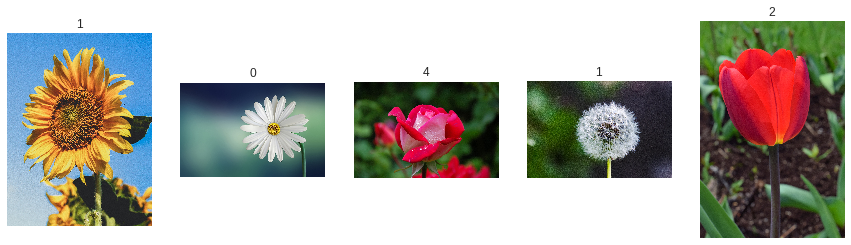

In [14]:

import cv2 

classes = ['daisy','dandelion','rose','sunflower','tulip']
images = ['sunflower.jpg','daisy.jpg','rose.jpg','dandelion.jpg','tulip.jpg']
for number in range(len(images)):
  imgLoaded = cv2.imread('testing/%s'%(images[number])) 
  img = cv2.resize(imgLoaded, (150, 150)) 
  #cv2.imwrite('test.jpg',img) 
  img = (img.astype(np.float32))/255.0 
  img = img.reshape(1, 150, 150, 3) 
  
  plt.subplot(1,5,number+1),plt.imshow(cv2.cvtColor(imgLoaded,cv2.COLOR_BGR2RGB)) 
  plt.title(np.argmax(model.predict(img)[0])) 
  plt.xticks([]),plt.yticks([]) 
fig = plt.gcf()
fig.set_size_inches(15, 15, forward=True)
plt.savefig("flowers_result.jpg", bbox_inches='tight')
plt.show()